<a href="https://colab.research.google.com/github/melchaorai/melchaorai/blob/main/Homework1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# การบ้านสัปดาห์ที่ 1
- ความเข้าใจพื้นฐานเรื่องภาพดิจิตอลสำหรับวิชาการประมวลผลภาพ เช่น pixel color, image size, type of image
- การอ่านไฟล์ภาพ (read image file) มาเป็นข้อมูลดิจิตอล

## แบบฝึกหัดที่ 1.1

**วัตถุประสงค์**
- เพื่อเป็นการทำความเข้าใจว่าภาพดิจิตอลก็คือข้อมูล array ของตัวเลขที่ถูกนำมาแสดงผลผ่านหน้าจอเท่านั้น


**โจทย์:**

- รันโปรแกรมต่อไปนี้แล้วสังเกตผล
- แก้ไขหรือเพิ่มเติมโค๊ดเพื่อให้ได้ผลลัพธ์ดังภาพที่กำหนด


<img align="left" width="100" height="100" src="https://github.com/jbinteam/010723305/blob/main/images/week1_output_sample.png?raw=true">

In [1]:
import numpy as np #เรียกใช้งาน library numpy โดยหลังจากนี้จะเรียกใช้ด้วยการพิมพ์สั้นๆแค่ np
from PIL import Image #เรียกใช้งาน Image จาก library PIL
from matplotlib import pyplot as plt #เรียกใช้งาน pyplot จาก matplotlib โดยหลังจากนี้จะเรียกใช้ด้วยการพิมพ์สั้นๆแค่ plt

from skimage import io as ski_io
import cv2
import numpy as np
from skimage.util import img_as_ubyte


data size: 30000
image size: (100, 100)


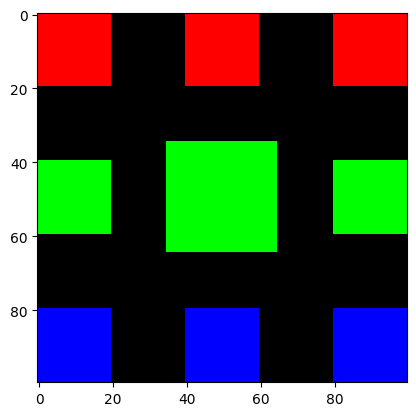

In [31]:
width, height = 100, 100 #กำหนดขนาดของข้อมูล
data = np.zeros((height, width, 3), dtype=np.uint8) #สร้างตัวแปรที่ชื่อว่า data เพื่อเก็บค่าของตัวเลข

print("data size:",data.size)

######## แก้ไข หรือ เพิ่มเติมโปรแกรมลงในโค๊ดด้านล่าง #######



data[0:20, 0:20] = [255, 0, 0] #แดงซ้าย
data[0:20, 40:60] = [255, 0, 0] #แดงกลาง
data[0:20, 80:100] = [255, 0, 0] #แดงขวา

data[40:60, 0:20] = [0, 255, 0] #เขียวซ้าย
data[35:65, 35:65] = [0, 255, 0] #เขียวกลาง
data[40:60, 80:100] = [0, 255, 0] #เขียวขวา

data[80:100, 80:100] = [0, 0, 255] #น้ำเงินขวา
data[80:100, 40:60] = [0, 0, 255] #น้ำเงินกลาง
data[80:100, 0:20] = [0, 0, 255] #น้ำเงินซ้าย



####################################################

img = Image.fromarray(data, 'RGB') #แปลงข้อมูลตัวเลขเป็นข้อมูลภาพประเภท RGB
print("image size:",img.size)

plt.imshow(img)
plt.show()

## แบบฝึกหัดที่ 1.2

**วัตถุประสงค์**
- เพื่อเป็นการทำความเข้าใจว่าภาพดิจิตอลก็คือข้อมูล array ของตัวเลขที่ถูกนำมาแสดงผลผ่านหน้าจอเท่านั้น (ต่อ)

**โจทย์:**

ให้นักศึกษาสังเกตผลลัพธ์จากการ run โค๊ดด้านล่างที่เป็นการนำข้อมูล array มาต่อกันก่อนที่จะแสดงผลแล้วตอบคำถามต่อไปนี้
- ตรวจสอบขนาดของภาพหลังจากการใช้คำสั่ง *np.hstack((a,b))*
- ลองเปลี่ยนคำสั่ง *np.hstack((a,b))* เป็น *np.vstack((a,b))* ตรวจสอบขนาดภาพอีกครั้ง

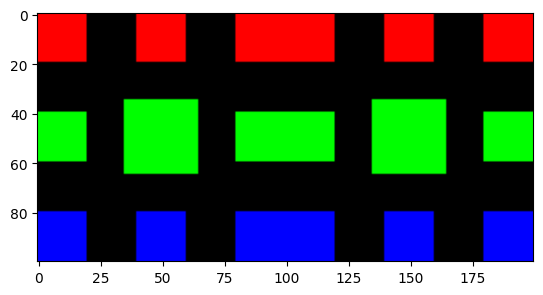

In [34]:
stack_data=np.hstack((data,data))
#stack_data=np.vstack((data,data))

images = Image.fromarray(stack_data, 'RGB')

#print("stack images:",images.size)

plt.imshow(images)
plt.show()

## แบบฝึกหัดที่ 1.3

**วัตถุประสงค์**
- เรียนรู้การ load ภาพตระกูล .jpg หรือ .png เข้ามาเป็นข้อมูลก่อนนำไปใช้ในการประมวลผล

**คำถาม:**
- การ load ภาพด้วย library จาก opencv และ load ภาพด้วย library จาก Pillow  ต่างกันหรือไม่ อย่างไรจงอธิบาย

In [ ]:
import urllib
url="https://github.com/jbinteam/010723305/blob/main/images/singapore-little-india.jpg?raw=true"

# image = ski_io.imread(url)
url_response = urllib.request.urlopen(url)

img_array = np.array(bytearray(url_response.read()), dtype=np.uint8)

cv_img = cv2.imdecode(img_array, -1) # 'Load it as it is'

# cv_img = img_as_ubyte(image) #แปลงข้อมูล unsigned byte เป็น image


print(cv_img.shape) # แสดงค่า shape ของภาพ (size, channel)

print(cv_img[0][0][0],cv_img[0][0][1],cv_img[0][0][2]) # แสดงค่า color intensity ที่ตำแหน่ง (0,0) ของแต่ละ channel

plt.imshow(cv_img)
plt.show()

In [ ]:
import urllib.request,io
path = io.BytesIO(urllib.request.urlopen(url).read())

pil_img=Image.open(path) #load ข้อมูลภาพด้วย pillow

#load ข้อมูล intensity สีของแต่ละ pixel
px = pil_img.load()

#แสดงค่า color intensity ตำแหน่ง [0,0] channel 0,1,2
print(px[0,0])

plt.imshow(pil_img)
plt.show()

## แบบฝึกหัดที่ 1.4

**วัตถุประสงค์**
- เรียนรู้การ load ภาพเข้ามาเป็นชุดข้อมูลรูปแบบ RGB, BGR, Grayscale

**คำถาม:**
- เมื่อ uncomment code ในหัวข้อย่อ 1.4.1 ถึง 1.4.4 หัวข้อใดยังสามารถทำงานได้หรือไม่ได้ เพราะอะไร



In [ ]:
gray_img = cv2.imdecode(img_array, cv2.IMREAD_GRAYSCALE) #load ข้อมูลเป็น grayscale
color_img = cv2.imdecode(img_array, cv2.IMREAD_COLOR) #load ข้อมูลเป็น color

#แสดงค่า　intensity สีของ pixel ตำแหน่งที่ [1,3] ของทั้ง 3 channel สี

# print(gray_img[0][0][0],gray_img[0][0][1],gray_img[0][0][2]) # 1.4.1

# print(gray_img.shape)
# print(color_img.shape)

#ทำการ stack data ก่อนนำมาแสดงผล
images=np.hstack((color_img,color_img)) # 1.4.2
# images=np.hstack((gray_img,gray_img)) # 1.4.3
# images=np.hstack((color_img,gray_img)) # 1.4.4

# images=cv2.cvtColor(images,cv2.COLOR_BGR2RGB) # ลองรันโปรแกรมแบบ　uncomment สลับกับ comment ในบรรทัดนี้ แล้วสังเกตผล

#เลือกวิธีแสดงผลตามประเภทของข้อมูลที่โหลด
# plt.imshow(images) #แสดงผลเป็นสี
plt.imshow(images,'gray') #แสดงผลเป็น　grayscale
plt.show()